## Análise de Dados para campanhas de Marketing de Instituições Financeiras

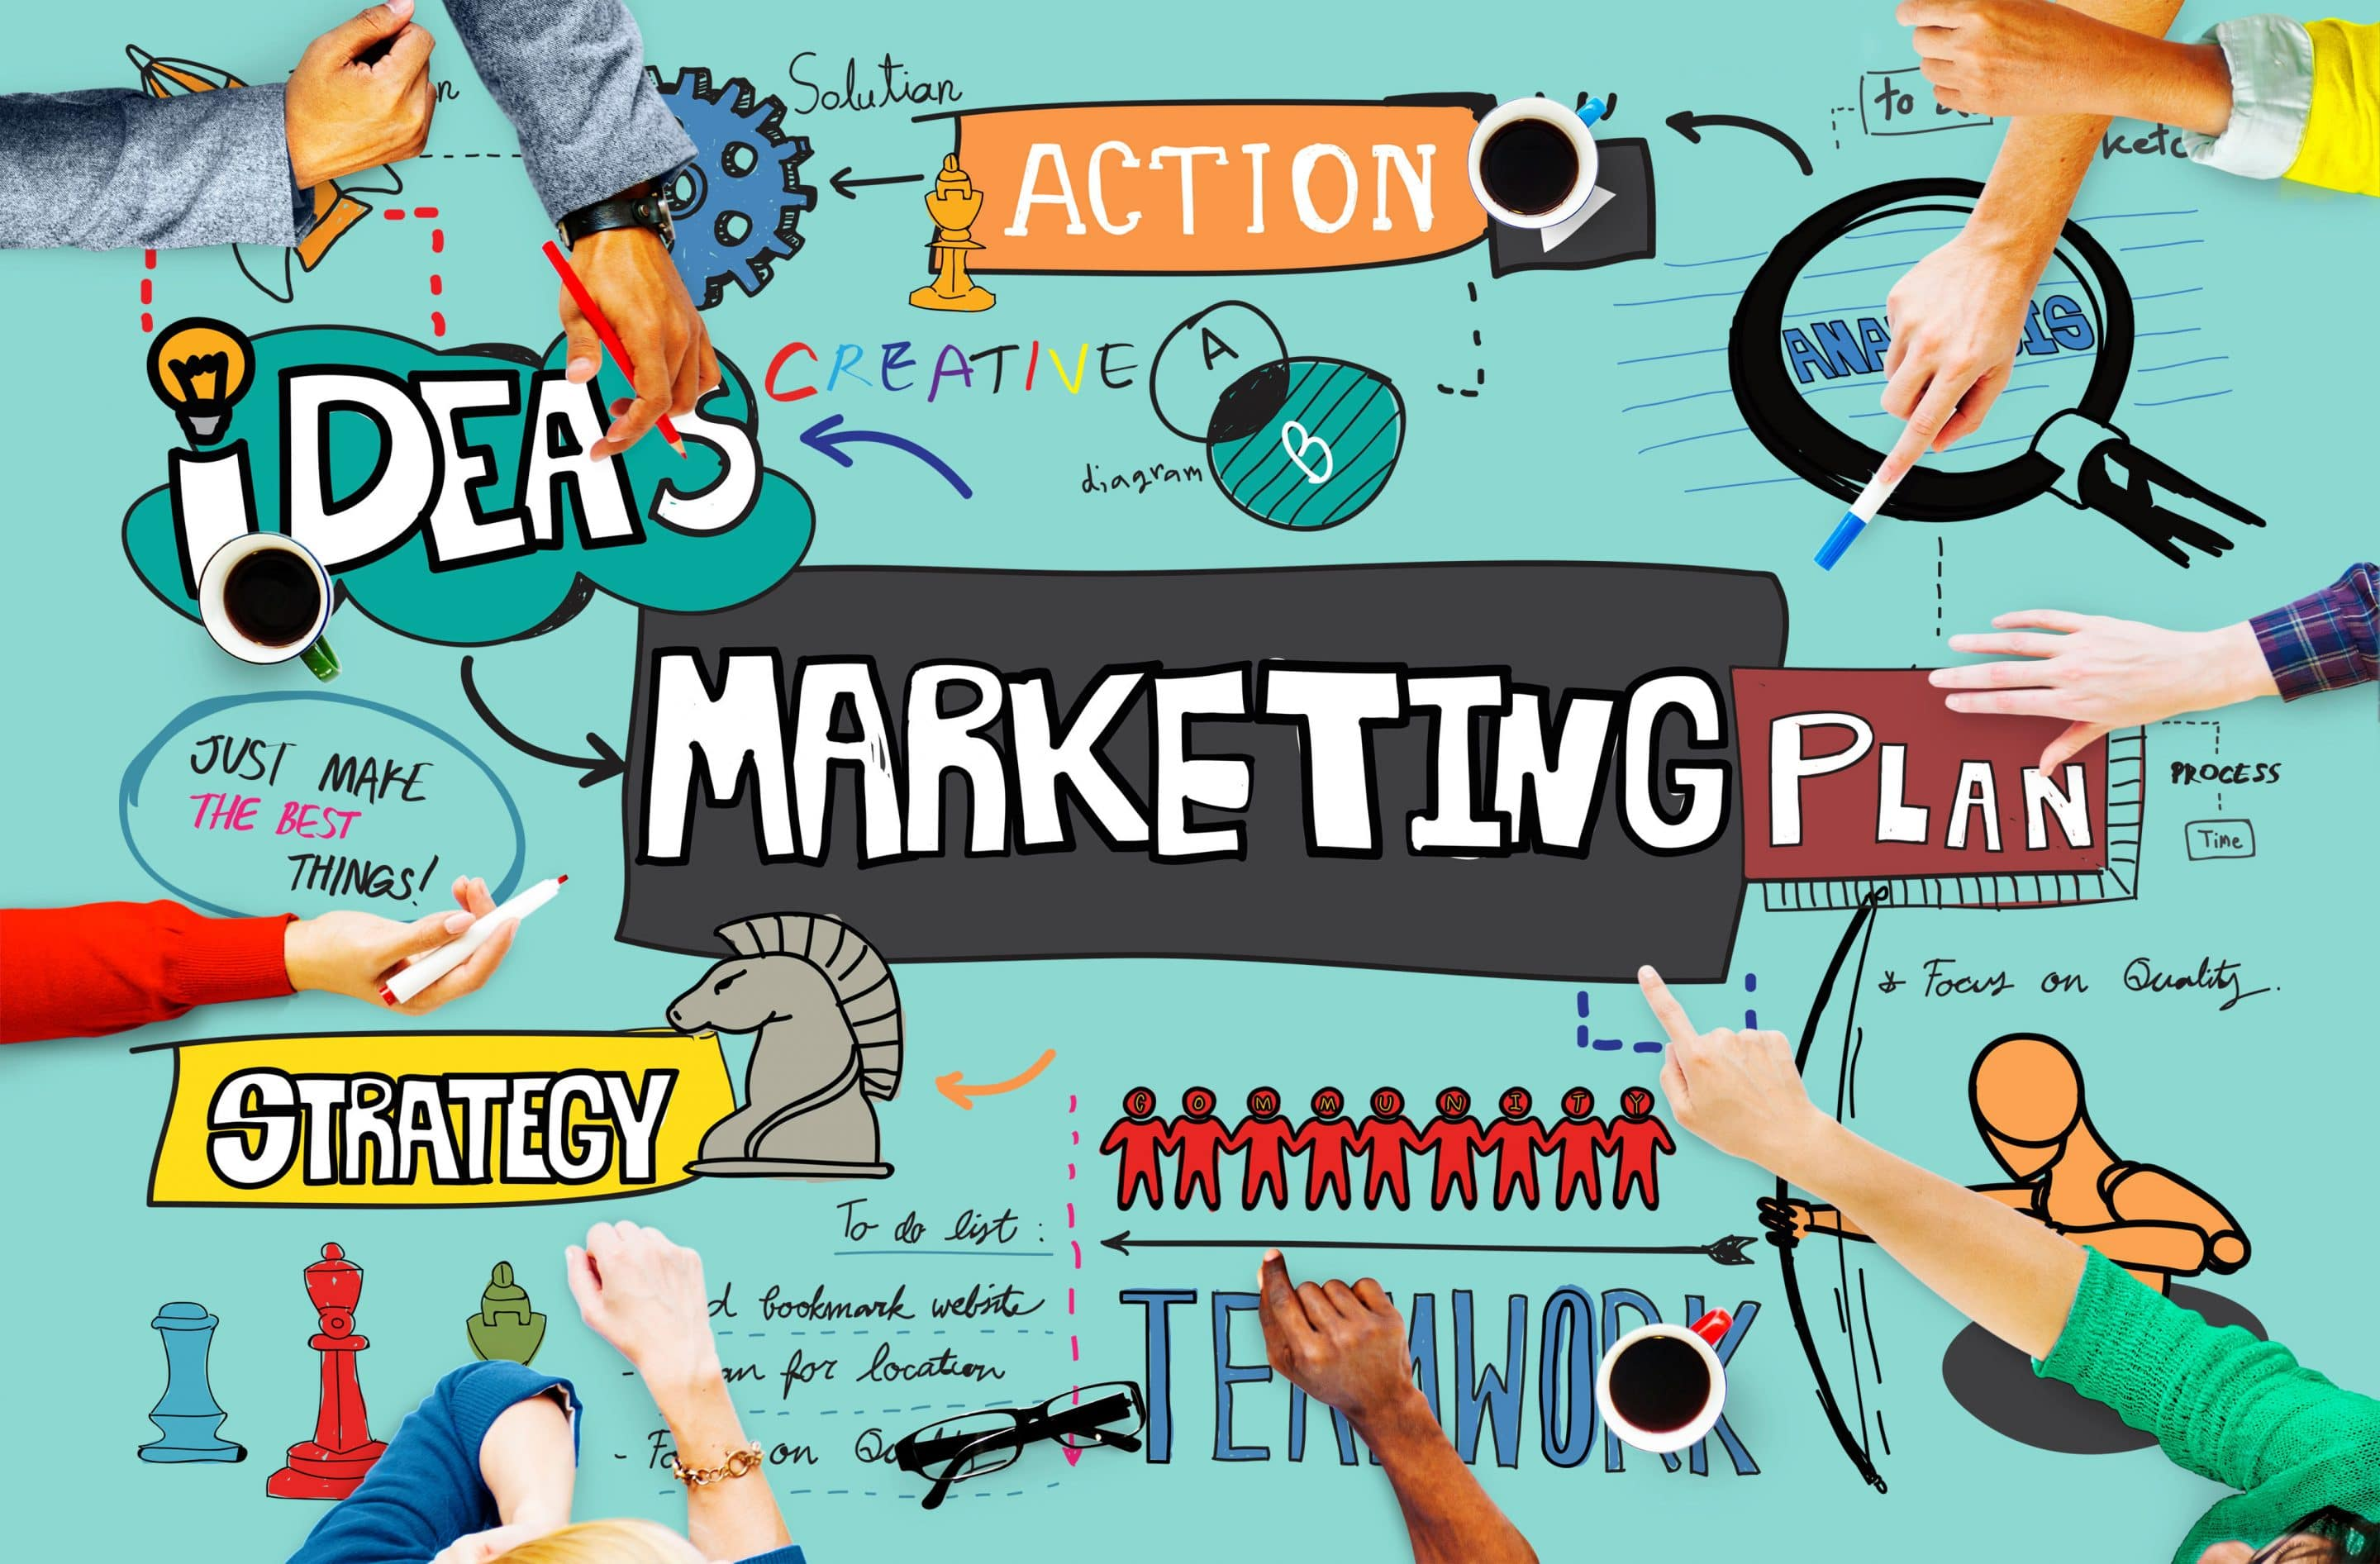

In [1]:
from IPython.display import Image
Image(r"C:\Users\aliso\OneDrive\Área de Trabalho\Projetos\Marketing.jpg", width=750)

###### Definição do problema de negócio


Vamos analisar dados referentes a campanhas de marketing direto de uma instituição bancária  portuguesa.  

As  campanhas  de  marketing  foram  baseadas  em  ligações  telefônicas. 

Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de saber se o produto (depósito bancário a prazo) seria ('sim') ou não ('não') adquirido pelo cliente. O dataset apresenta diversos problemas pois é um dataset com dados reais.

Daremos ênfase ao tratamento de valores ausentes, mas também faremos a limpeza e tratamento de outros eventuais problemas que detectarmos.

# Instalando e carregando os pacotes

In [1]:
# Verificando versão python

from platform import python_version
print('Versão da linguagem python usada neste projeto: ', python_version())

Versão da linguagem python usada neste projeto:  3.9.13


In [2]:
# Imports 

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Matemática
import math

# Ignore warnings
import sys, os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Temporal
from datetime import datetime

In [3]:
# Versões dos pacotes

%reload_ext watermark
%watermark -a "Alison Araújo" --iversions
print(f"Data de início do projeto: {datetime.today().strftime('%Y-%m-%d')}")

Author: Alison Araújo

seaborn   : 0.13.0
matplotlib: 3.4.3
missingno : 0.5.0
pandas    : 1.3.3
IPython   : 7.31.1
sys       : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
json      : 2.0.9
ctypes    : 1.1.0
plotly    : 5.3.1
numpy     : 1.23.5

Data de início do projeto: 2023-11-27


In [4]:
# Importando os módulos de python

sys.path.append(os.path.abspath(os.path.join(r'C:\Users\aliso\OneDrive\Desktop\formacao_fad\PYTHON\Cap04\modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

# Carregando os dados

In [5]:
# Importando o dataset

df = pd.read_csv(r'C:\Users\aliso\OneDrive\Desktop\formacao_fad\PYTHON\Cap05\dados\dataset.csv')

In [6]:
df.sample(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
4881,4882,30.0,20000.0,453,married,"blue-collar,primary",yes,no,yes,no,unknown,21,"may, 2017",445 sec,2,-1,0,unknown,no
36943,36944,33.0,50000.0,422,single,"admin.,secondary",yes,no,yes,no,cellular,12,"may, 2017",3.91666666666667 min,2,361,2,failure,no
23187,23188,35.0,60000.0,0,married,"technician,secondary",yes,no,no,no,cellular,27,"aug, 2017",1.76666666666667 min,4,-1,0,unknown,no
11162,11163,56.0,120000.0,2351,single,"entrepreneur,unknown",no,no,no,no,unknown,18,"jun, 2017",15 sec,1,-1,0,unknown,no
10164,10165,35.0,20000.0,164,divorced,"blue-collar,unknown",no,no,no,no,unknown,11,"jun, 2017",967 sec,2,-1,0,unknown,yes
11771,11772,40.0,70000.0,5807,married,"services,secondary",yes,no,yes,no,unknown,20,"jun, 2017",98 sec,1,-1,0,unknown,no
20453,20454,58.0,55000.0,7560,married,"retired,secondary",yes,no,no,no,cellular,12,"aug, 2017",6.06666666666667 min,2,-1,0,unknown,no
42966,42967,33.0,100000.0,935,single,"management,tertiary",no,no,no,no,cellular,9,"feb, 2017",6.41666666666667 min,2,92,8,success,yes
8884,8885,27.0,20000.0,419,married,"blue-collar,secondary",yes,no,yes,no,unknown,4,"jun, 2017",1181 sec,2,-1,0,unknown,yes
24296,24297,49.0,70000.0,1084,married,"services,secondary",yes,no,yes,no,telephone,17,"nov, 2017",1.65 min,1,-1,0,unknown,no


In [7]:
df.shape

(45211, 19)

# Análise Exploratória - Ciclo 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [9]:
# Visualizando as variáveis numéricas

df.select_dtypes(include=['float', 'int'])

,customerid,age,salary,balance,day,campaign,pdays,previous
0,1,58.0,100000.0,2143,5,1,-1,0
1,2,44.0,60000.0,29,5,1,-1,0
2,3,33.0,120000.0,2,5,1,-1,0
3,4,47.0,20000.0,1506,5,1,-1,0
4,5,33.0,0.0,1,5,1,-1,0
...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000.0,825,17,3,-1,0
45207,45208,71.0,55000.0,1729,17,2,-1,0
45208,45209,72.0,55000.0,5715,17,5,184,3
45209,45210,57.0,20000.0,668,17,4,-1,0


In [10]:
# Visualizando as variáveis categóricas

df.select_dtypes(include='object')

,marital,jobedu,targeted,default,housing,loan,contact,month,duration,poutcome,response
0,married,"management,tertiary",yes,no,yes,no,unknown,"may, 2017",261 sec,unknown,no
1,single,"technician,secondary",yes,no,yes,no,unknown,"may, 2017",151 sec,unknown,no
2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,"may, 2017",76 sec,unknown,no
3,married,"blue-collar,unknown",no,no,yes,no,unknown,"may, 2017",92 sec,unknown,no
4,single,"unknown,unknown",no,no,no,no,unknown,"may, 2017",198 sec,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,married,"technician,tertiary",yes,no,no,no,cellular,"nov, 2017",16.2833333333333 min,unknown,yes
45207,divorced,"retired,primary",yes,no,no,no,cellular,"nov, 2017",7.6 min,unknown,yes
45208,married,"retired,secondary",yes,no,no,no,cellular,"nov, 2017",18.7833333333333 min,success,yes
45209,married,"blue-collar,secondary",yes,no,no,no,telephone,"nov, 2017",8.46666666666667 min,unknown,no


# Limpeza e tratamento - Ciclo 1

In [11]:
# Aplicaremos uma limpeza cíclica, vide que temos necessidade de engenharia de atributo nas variáveis, jobedu, month e duration

# Iniciando pela jobedu

df[['job', 'edu']] = df['jobedu'].str.split(',', expand = True)

In [12]:
# Checando se o split ocorreu de forma adequada

df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response',
       'job', 'edu'],
      dtype='object')

In [13]:
# Aplicaremos uma limpeza cíclica, vide que temos necessidade de engenharia de atributo nas variáveis, jobedu, month e duration

# Realizando para a month

df[['month', 'year']] = df['month'].str.split(',', expand = True)

In [14]:
# Checando se o split ocorreu de forma adequada

df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response',
       'job', 'edu', 'year'],
      dtype='object')

In [15]:
# Visualizando o dataframe

df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,job,edu,year
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,...,may,261 sec,1,-1,0,unknown,no,management,tertiary,2017
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,...,may,151 sec,1,-1,0,unknown,no,technician,secondary,2017
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,2017
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,...,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown,2017
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,...,may,198 sec,1,-1,0,unknown,no,unknown,unknown,2017


In [16]:
# Separando as colunas entre duracao para conversao e escala

df[['duration', 'grandeza_temporal']] = df['duration'].str.split(' ', expand = True)

In [17]:
df.tail(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,year,grandeza_temporal
45201,45202,53.0,100000.0,583,married,"management,tertiary",yes,no,no,no,...,3.76666666666667,1,184,4,success,yes,management,tertiary,2017,min
45202,45203,34.0,50000.0,557,single,"admin.,secondary",yes,no,no,no,...,3.73333333333333,1,-1,0,unknown,yes,admin.,secondary,2017,min
45203,45204,23.0,4000.0,113,single,"student,tertiary",no,no,no,no,...,4.43333333333333,1,-1,0,unknown,yes,student,tertiary,2017,min
45204,45205,73.0,55000.0,2850,married,"retired,secondary",yes,no,no,no,...,5,1,40,8,failure,yes,retired,secondary,2017,min
45205,45206,25.0,60000.0,505,single,"technician,secondary",yes,no,no,yes,...,6.43333333333333,2,-1,0,unknown,yes,technician,secondary,2017,min
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,...,16.2833333333333,3,-1,0,unknown,yes,technician,tertiary,2017,min
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,...,7.6,2,-1,0,unknown,yes,retired,primary,2017,min
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,...,18.7833333333333,5,184,3,success,yes,retired,secondary,2017,min
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,...,8.46666666666667,4,-1,0,unknown,no,blue-collar,secondary,2017,min
45210,45211,37.0,120000.0,2971,married,"entrepreneur,secondary",yes,no,no,no,...,6.01666666666667,2,188,11,other,no,entrepreneur,secondary,2017,min


In [18]:
# Conversão de tipo da coluna duration para seja escalonado 

convert_to_float(df, ['duration'])

In [19]:
df.dtypes

customerid             int64
age                  float64
salary               float64
balance                int64
marital               object
jobedu                object
targeted              object
default               object
housing               object
loan                  object
contact               object
day                    int64
month                 object
duration             float64
campaign               int64
pdays                  int64
previous               int64
poutcome              object
response              object
job                   object
edu                   object
year                  object
grandeza_temporal     object
dtype: object

In [20]:
df.tail(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,year,grandeza_temporal
45201,45202,53.0,100000.0,583,married,"management,tertiary",yes,no,no,no,...,3.766667,1,184,4,success,yes,management,tertiary,2017,min
45202,45203,34.0,50000.0,557,single,"admin.,secondary",yes,no,no,no,...,3.733333,1,-1,0,unknown,yes,admin.,secondary,2017,min
45203,45204,23.0,4000.0,113,single,"student,tertiary",no,no,no,no,...,4.433333,1,-1,0,unknown,yes,student,tertiary,2017,min
45204,45205,73.0,55000.0,2850,married,"retired,secondary",yes,no,no,no,...,5.000000,1,40,8,failure,yes,retired,secondary,2017,min
45205,45206,25.0,60000.0,505,single,"technician,secondary",yes,no,no,yes,...,6.433333,2,-1,0,unknown,yes,technician,secondary,2017,min
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,...,16.283333,3,-1,0,unknown,yes,technician,tertiary,2017,min
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,...,7.600000,2,-1,0,unknown,yes,retired,primary,2017,min
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,...,18.783333,5,184,3,success,yes,retired,secondary,2017,min
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,...,8.466667,4,-1,0,unknown,no,blue-collar,secondary,2017,min
45210,45211,37.0,120000.0,2971,married,"entrepreneur,secondary",yes,no,no,no,...,6.016667,2,188,11,other,no,entrepreneur,secondary,2017,min


In [21]:
# Checando a coluna grandeza_temporal para verificar a conversão a ser feita

df2 = np.unique(df[['grandeza_temporal']].values)
print(df2)

['min' 'sec']


Como temos apenas minutos e segundos, poderemos realizar a multiplicação por 60, convertendo toda a coluna para segundos

In [22]:
# Ajuste de escala da coluna duration

# Conversão da coluna duration para 
multiply_by_factor(df, ['duration'], 1*60)

In [23]:
df.tail(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,year,grandeza_temporal
45201,45202,53.0,100000.0,583,married,"management,tertiary",yes,no,no,no,...,226.0,1,184,4,success,yes,management,tertiary,2017,min
45202,45203,34.0,50000.0,557,single,"admin.,secondary",yes,no,no,no,...,224.0,1,-1,0,unknown,yes,admin.,secondary,2017,min
45203,45204,23.0,4000.0,113,single,"student,tertiary",no,no,no,no,...,266.0,1,-1,0,unknown,yes,student,tertiary,2017,min
45204,45205,73.0,55000.0,2850,married,"retired,secondary",yes,no,no,no,...,300.0,1,40,8,failure,yes,retired,secondary,2017,min
45205,45206,25.0,60000.0,505,single,"technician,secondary",yes,no,no,yes,...,386.0,2,-1,0,unknown,yes,technician,secondary,2017,min
45206,45207,51.0,60000.0,825,married,"technician,tertiary",yes,no,no,no,...,977.0,3,-1,0,unknown,yes,technician,tertiary,2017,min
45207,45208,71.0,55000.0,1729,divorced,"retired,primary",yes,no,no,no,...,456.0,2,-1,0,unknown,yes,retired,primary,2017,min
45208,45209,72.0,55000.0,5715,married,"retired,secondary",yes,no,no,no,...,1127.0,5,184,3,success,yes,retired,secondary,2017,min
45209,45210,57.0,20000.0,668,married,"blue-collar,secondary",yes,no,no,no,...,508.0,4,-1,0,unknown,no,blue-collar,secondary,2017,min
45210,45211,37.0,120000.0,2971,married,"entrepreneur,secondary",yes,no,no,no,...,361.0,2,188,11,other,no,entrepreneur,secondary,2017,min


In [24]:
# Realizando o arredondamento da coluna duration

df.duration.round(2)

0        15660.0
1         9060.0
2         4560.0
3         5520.0
4        11880.0
          ...   
45206      977.0
45207      456.0
45208     1127.0
45209      508.0
45210      361.0
Name: duration, Length: 45211, dtype: float64

In [25]:
df.sample(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,job,edu,year,grandeza_temporal
22874,22875,47.0,20000.0,799,married,"blue-collar,primary",yes,no,no,no,...,67.0,4,-1,0,unknown,no,blue-collar,primary,2017,min
20424,20425,54.0,100000.0,3020,married,"management,tertiary",yes,no,no,no,...,106.0,2,-1,0,unknown,no,management,tertiary,2017,min
22259,22260,34.0,100000.0,197,single,"management,tertiary",no,no,no,yes,...,274.0,4,-1,0,unknown,no,management,tertiary,2017,min
4066,4067,55.0,20000.0,1261,married,"blue-collar,secondary",yes,no,no,no,...,9960.0,1,-1,0,unknown,no,blue-collar,secondary,2017,sec
18724,18725,30.0,60000.0,702,married,"technician,tertiary",yes,no,no,yes,...,40.0,29,-1,0,unknown,no,technician,tertiary,2017,min
32487,32488,37.0,20000.0,346,married,"blue-collar,secondary",yes,no,yes,no,...,390.0,1,316,1,failure,no,blue-collar,secondary,2017,min
34215,34216,36.0,70000.0,365,single,"services,secondary",yes,no,no,no,...,643.0,1,-1,0,unknown,yes,services,secondary,2017,min
22692,22693,53.0,60000.0,394,divorced,"technician,secondary",yes,no,no,no,...,103.0,5,-1,0,unknown,no,technician,secondary,2017,min
23264,23265,48.0,60000.0,2328,divorced,"technician,tertiary",no,no,no,no,...,129.0,7,-1,0,unknown,no,technician,tertiary,2017,min
44242,44243,47.0,60000.0,523,married,"self-employed,secondary",yes,no,no,no,...,7.0,1,-1,0,unknown,no,self-employed,secondary,2017,min


In [26]:
# Drop da coluna jobedu

df.drop(['jobedu', 'grandeza_temporal'], axis = 1, inplace = True)

In [27]:
# Checando se o drop ocorreu de forma adequada

print([x for x in df.columns])

['customerid', 'age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'job', 'edu', 'year']


Na coluna job, temos o registro admin., iremos ajustar para admin

In [28]:
# Checando os valores distintos da coluna job
valores_distintos = df['job'].unique()

# Exibindo os valores distintos
print(valores_distintos)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [29]:
# Realizandoa a substituição dos valores admin

df['job'] = df['job'].replace('admin.', 'admin')
df['contact'] = df['contact'].replace('cellular', 'celular')

In [30]:
# Checando se os valores foram substituídos
valores_distintos_job = df['job'].unique()
valores_distintos_contact = df['contact'].unique()

# Exibindo os valores distintos
print("Coluna job: ", valores_distintos_job)
print("\nColuna contact: ", valores_distintos_contact)

Coluna job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Coluna contact:  ['unknown' 'celular' 'telephone']


In [31]:
# Amostra dos dados

df.sample(10)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,response,job,edu,year
19040,19041,52.0,50000.0,813,married,yes,no,no,yes,celular,...,aug,113.0,2,-1,0,unknown,no,admin,primary,2017
21444,21445,31.0,100000.0,0,single,yes,no,no,no,celular,...,aug,87.0,7,-1,0,unknown,no,management,secondary,2017
17065,17066,41.0,50000.0,1672,married,yes,no,yes,no,celular,...,jul,148.0,1,-1,0,unknown,no,admin,secondary,2017
10432,10433,49.0,20000.0,3049,married,yes,no,no,no,unknown,...,jun,7440.0,2,-1,0,unknown,no,blue-collar,primary,2017
16123,16124,53.0,55000.0,3126,married,yes,no,yes,no,celular,...,jul,237.0,1,-1,0,unknown,no,retired,primary,2017
41299,41300,21.0,4000.0,1596,single,yes,no,no,no,celular,...,aug,115.0,1,93,2,failure,no,student,primary,2017
33175,33176,34.0,20000.0,550,single,yes,no,yes,no,celular,...,apr,90.0,3,346,1,failure,no,blue-collar,secondary,2017
14369,14370,40.0,20000.0,45,single,yes,no,yes,yes,celular,...,jul,106.0,4,-1,0,unknown,no,blue-collar,primary,2017
43905,43906,29.0,20000.0,322,single,yes,no,no,no,unknown,...,jun,434.0,1,96,6,other,yes,blue-collar,secondary,2017
289,290,40.0,60000.0,672,married,yes,no,yes,no,unknown,...,may,9840.0,2,-1,0,unknown,no,self-employed,secondary,2017


In [32]:
# Renomeando a coluna customerid

df = df.rename(columns={'customerid': 'customer_id', 'duration': 'duration(s)'})

In [33]:
df.columns

Index(['customer_id', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration(s)',
       'campaign', 'pdays', 'previous', 'poutcome', 'response', 'job', 'edu',
       'year'],
      dtype='object')

In [34]:
df.dtypes

customer_id      int64
age            float64
salary         float64
balance          int64
marital         object
targeted        object
default         object
housing         object
loan            object
contact         object
day              int64
month           object
duration(s)    float64
campaign         int64
pdays            int64
previous         int64
poutcome        object
response        object
job             object
edu             object
year            object
dtype: object

Temos as colunas day, month e year. Podemos concatená-las para reduzir o armazenamento do nosso dataframe

In [35]:
# Concatenando as colunas day, month e year e convertendo o tipo da coluna date

df['date'] = df['day'].astype(str) + df['month'] + df['year']
convert_to_datetime(df, ['date'])

In [36]:
df.columns

Index(['customer_id', 'age', 'salary', 'balance', 'marital', 'targeted',
       'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration(s)',
       'campaign', 'pdays', 'previous', 'poutcome', 'response', 'job', 'edu',
       'year', 'date'],
      dtype='object')

In [37]:
# Amostra dos dados

df.head()

,customer_id,age,salary,balance,marital,targeted,default,housing,loan,contact,...,duration(s),campaign,pdays,previous,poutcome,response,job,edu,year,date
0,1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,...,15660.0,1,-1,0,unknown,no,management,tertiary,2017,2017-05-05
1,2,44.0,60000.0,29,single,yes,no,yes,no,unknown,...,9060.0,1,-1,0,unknown,no,technician,secondary,2017,2017-05-05
2,3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,...,4560.0,1,-1,0,unknown,no,entrepreneur,secondary,2017,2017-05-05
3,4,47.0,20000.0,1506,married,no,no,yes,no,unknown,...,5520.0,1,-1,0,unknown,no,blue-collar,unknown,2017,2017-05-05
4,5,33.0,0.0,1,single,no,no,no,no,unknown,...,11880.0,1,-1,0,unknown,no,unknown,unknown,2017,2017-05-05


In [38]:
# Drop das colunas day, month e year

df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [39]:
df.dtypes

customer_id             int64
age                   float64
salary                float64
balance                 int64
marital                object
targeted               object
default                object
housing                object
loan                   object
contact                object
duration(s)           float64
campaign                int64
pdays                   int64
previous                int64
poutcome               object
response               object
job                    object
edu                    object
date           datetime64[ns]
dtype: object

In [40]:
# Reordenando as colunas

df = df[['customer_id',
    'age',
    'salary',
    'job',
    'balance',
    'marital',
    'targeted',
    'default',
    'housing',
    'loan',
    'contact',
    'date',
    'duration(s)',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'response']]

A conversao de tipo para algumas variáveis ficará para o final, pois possuem valores ausentes

# Análise Exploratória - Ciclo 2

In [41]:
# Amostra dos dados - primeiros registros

df.head(10)

,customer_id,age,salary,job,balance,marital,targeted,default,housing,loan,contact,date,duration(s),campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,management,2143,married,yes,no,yes,no,unknown,2017-05-05,15660.0,1,-1,0,unknown,no
1,2,44.0,60000.0,technician,29,single,yes,no,yes,no,unknown,2017-05-05,9060.0,1,-1,0,unknown,no
2,3,33.0,120000.0,entrepreneur,2,married,yes,no,yes,yes,unknown,2017-05-05,4560.0,1,-1,0,unknown,no
3,4,47.0,20000.0,blue-collar,1506,married,no,no,yes,no,unknown,2017-05-05,5520.0,1,-1,0,unknown,no
4,5,33.0,0.0,unknown,1,single,no,no,no,no,unknown,2017-05-05,11880.0,1,-1,0,unknown,no
5,6,35.0,100000.0,management,231,married,yes,no,yes,no,unknown,2017-05-05,8340.0,1,-1,0,unknown,no
6,7,28.0,100000.0,management,447,single,no,no,yes,yes,unknown,2017-05-05,13020.0,1,-1,0,unknown,no
7,8,42.0,120000.0,entrepreneur,2,divorced,no,yes,yes,no,unknown,2017-05-05,22800.0,1,-1,0,unknown,no
8,9,58.0,55000.0,retired,121,married,yes,no,yes,no,unknown,2017-05-05,3000.0,1,-1,0,unknown,no
9,10,43.0,60000.0,technician,593,single,yes,no,yes,no,unknown,2017-05-05,3300.0,1,-1,0,unknown,no


In [42]:
# Amostra dos dados - últimos registros

df.tail(10)

,customer_id,age,salary,job,balance,marital,targeted,default,housing,loan,contact,date,duration(s),campaign,pdays,previous,poutcome,response
45201,45202,53.0,100000.0,management,583,married,yes,no,no,no,celular,2017-11-17,226.0,1,184,4,success,yes
45202,45203,34.0,50000.0,admin,557,single,yes,no,no,no,celular,2017-11-17,224.0,1,-1,0,unknown,yes
45203,45204,23.0,4000.0,student,113,single,no,no,no,no,celular,2017-11-17,266.0,1,-1,0,unknown,yes
45204,45205,73.0,55000.0,retired,2850,married,yes,no,no,no,celular,2017-11-17,300.0,1,40,8,failure,yes
45205,45206,25.0,60000.0,technician,505,single,yes,no,no,yes,celular,2017-11-17,386.0,2,-1,0,unknown,yes
45206,45207,51.0,60000.0,technician,825,married,yes,no,no,no,celular,2017-11-17,977.0,3,-1,0,unknown,yes
45207,45208,71.0,55000.0,retired,1729,divorced,yes,no,no,no,celular,2017-11-17,456.0,2,-1,0,unknown,yes
45208,45209,72.0,55000.0,retired,5715,married,yes,no,no,no,celular,2017-11-17,1127.0,5,184,3,success,yes
45209,45210,57.0,20000.0,blue-collar,668,married,yes,no,no,no,telephone,2017-11-17,508.0,4,-1,0,unknown,no
45210,45211,37.0,120000.0,entrepreneur,2971,married,yes,no,no,no,celular,2017-11-17,361.0,2,188,11,other,no


In [43]:
df.isnull().sum()

customer_id     0
age            20
salary         26
job             0
balance         0
marital         0
targeted        0
default         0
housing         0
loan            0
contact         0
date           50
duration(s)     0
campaign        0
pdays           0
previous        0
poutcome        0
response       30
dtype: int64

In [44]:
# Percentual de valores ausentes no dataframe

func_calc_percentual_valores_ausentes(df)

O dataset tem 0.02 % de valores ausentes.


In [45]:
# Checando percentual de valores ausentes por coluna no dataframe

func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 18 colunas.
Encontrado: 4 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
date,50,0.11,datetime64[ns]
response,30,0.07,object
salary,26,0.06,float64
age,20,0.04,float64


In [46]:
# Checando percentual de valores ausentes por coluna no dataframe

func_calc_percentual_valores_ausentes_linha(df)

0.28 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [47]:
valores_distintos_response = df['response'].unique()
print(valores_distintos_response)

['no' 'yes' nan]


Na coluna response, iremos realizar mudança de nan para 'other'

In [48]:
# Imputação de variáveis categóricas

fix_missing_value(df, 'response', 'other')

30 valores ausentes na coluna response foram substituídos por other.


0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45211, dtype: object

In [49]:
# Checando se fora realizado a modificação

valores_distintos_response = df['response'].unique()
print(valores_distintos_response)

['no' 'yes' 'other']


In [50]:
# Checando percentual de valores ausentes por coluna no dataframe

func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 18 colunas.
Encontrado: 3 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
date,50,0.11,datetime64[ns]
salary,26,0.06,float64
age,20,0.04,float64


In [60]:
# Checando se fora realizado a modificação

registros_vazios = df.filter(df[['age', 'date', 'salary']].isnull())
print(registros_vazios)

        age       date    salary
0      58.0 2017-05-05  100000.0
1      44.0 2017-05-05   60000.0
2      33.0 2017-05-05  120000.0
3      47.0 2017-05-05   20000.0
4      33.0 2017-05-05       0.0
...     ...        ...       ...
45206  51.0 2017-11-17   60000.0
45207  71.0 2017-11-17   55000.0
45208  72.0 2017-11-17   55000.0
45209  57.0 2017-11-17   20000.0
45210  37.0 2017-11-17  120000.0

[45211 rows x 3 columns]


Como os registros de valores vazios se assemelham, checaremos se houve duplicadas

In [61]:
df.duplicated().sum()

0

# Limpeza e tratamento - Ciclo 2

Como são poucos registros vazios após a limpeza, iremos usar o liswise como técnica de limpeza

In [66]:
# Drop de linhas com valores ausentes

drop_rows_with_missing_values(df)

96 linhas contendo valores ausentes foram descartadas.


In [68]:
# Percentual de valores ausentes no dataframe

func_calc_percentual_valores_ausentes(df)

O dataset tem 0.0 % de valores ausentes.


In [69]:
# Checando percentual de valores ausentes por coluna no dataframe

func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 18 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [70]:
# Checando percentual de valores ausentes por coluna no dataframe

func_calc_percentual_valores_ausentes_linha(df)

0.0 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


# Conversão de tipo

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45115 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  45115 non-null  int64         
 1   age          45115 non-null  float64       
 2   salary       45115 non-null  float64       
 3   job          45115 non-null  object        
 4   balance      45115 non-null  int64         
 5   marital      45115 non-null  object        
 6   targeted     45115 non-null  object        
 7   default      45115 non-null  object        
 8   housing      45115 non-null  object        
 9   loan         45115 non-null  object        
 10  contact      45115 non-null  object        
 11  date         45115 non-null  datetime64[ns]
 12  duration(s)  45115 non-null  float64       
 13  campaign     45115 non-null  int64         
 14  pdays        45115 non-null  int64         
 15  previous     45115 non-null  int64         
 16  pout

Neste caso, a conversão das demais colunas já foram realizadas no processo de limpeza, sobrando apenas a colunas age que precisava de um tratamento

In [73]:
# Conversão da coluna age para int

convert_to_int(df, ['age'])

In [74]:
df.dtypes

customer_id             int64
age                     int64
salary                float64
job                    object
balance                 int64
marital                object
targeted               object
default                object
housing                object
loan                   object
contact                object
date           datetime64[ns]
duration(s)           float64
campaign                int64
pdays                   int64
previous                int64
poutcome               object
response               object
dtype: object

In [75]:
# Amostra dos dados

df.sample(10)

,customer_id,age,salary,job,balance,marital,targeted,default,housing,loan,contact,date,duration(s),campaign,pdays,previous,poutcome,response
12725,12726,53,100000.0,management,243,divorced,no,no,yes,no,celular,2017-07-07,3960.0,2,-1,0,unknown,no
37906,37907,48,20000.0,blue-collar,333,married,yes,no,yes,no,celular,2017-05-14,24.0,6,-1,0,unknown,no
37391,37392,35,70000.0,services,102,married,yes,no,yes,no,celular,2017-05-13,252.0,5,-1,0,unknown,no
9889,9890,45,20000.0,blue-collar,900,married,yes,no,yes,no,unknown,2017-06-09,12780.0,1,-1,0,unknown,no
34379,34380,27,100000.0,management,88,single,no,no,no,no,celular,2017-05-04,143.0,1,-1,0,unknown,no
3385,3386,42,70000.0,services,8,married,no,no,yes,no,unknown,2017-05-15,17940.0,1,-1,0,unknown,no
25463,25464,53,100000.0,management,57,married,yes,no,no,yes,celular,2017-11-19,84.0,3,-1,0,unknown,no
34076,34077,32,100000.0,management,566,single,no,no,no,no,celular,2017-04-30,114.0,2,-1,0,unknown,no
32141,32142,33,50000.0,admin,855,married,yes,no,no,no,celular,2017-04-15,110.0,1,-1,0,unknown,yes
19889,19890,55,60000.0,self-employed,0,married,yes,no,no,no,celular,2017-08-08,138.0,2,-1,0,unknown,no


# Fim